## Libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows", 150)
sns.set_style("darkgrid")
plt.rcParams["font.size"] = 14
plt.rcParams["figure.figsize"] =(10,6)
plt.rcParams["figure.facecolor"] = "#00000000"

#### Import dataset

In [ ]:
data = pd.read_csv("Live.csv")

In [ ]:
data.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


## EDA

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [ ]:
data.columns

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys', 'Column1', 'Column2', 'Column3',
       'Column4'],
      dtype='object')

In [ ]:
# Convert 'status_published' to datetime and get the hr, dayname daynumber, monthname, year
def time(data):
  data['status_published'] = pd.to_datetime(data['status_published'])
  # Derive additional date-related columns
  data['hour'] = data['status_published'].dt.hour
  data['dayname'] = data['status_published'].dt.day_name()
  data['daynumber'] = data['status_published'].dt.day
  data['monthname'] = data['status_published'].dt.month_name()
  data['year'] = data['status_published'].dt.year 

  return data



In [ ]:
data = time(data)
data.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,hour,dayname,daynumber,monthname,year
0,246675545449582_1649696485147474,video,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0,6,Sunday,22,April,2018
1,246675545449582_1649426988507757,photo,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0,22,Saturday,21,April,2018
2,246675545449582_1648730588577397,video,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0,6,Saturday,21,April,2018
3,246675545449582_1648576705259452,photo,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0,2,Saturday,21,April,2018
4,246675545449582_1645700502213739,photo,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0,3,Wednesday,18,April,2018


In [ ]:
## Drop Columns 'Column1', 'Column2', 'Column3','Column4'
data = data.drop(['Column1', 'Column2', 'Column3',  'Column4'], axis = 1)

In [ ]:
data.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [ ]:
# Access the statistical summary
data.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,hour,daynumber,year
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,7.829504,15.792624,2016.382128
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,6.886893,8.728489,1.943176
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2012.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,8.000000,2016.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,16.000000,2017.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,23.000000,2018.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,23.000000,31.000000,2018.000000


In [ ]:
data.shape

(7050, 12)

## Univariate Analysis

In [29]:
# def to create function for plotting
def myplot(df, colname, figsize = (14, 6)):
  # Count value in 'status_type' column
  status_counts = df[colname].value_counts()

  # Create a bar plot
  plt.bar(status_counts.index, status_counts.values)

  # Set plot title and axis labels
  plt.title(f'Counts of {colname}'.title(), fontsize =14, weight = "bold")
  
  plt.xlabel(colname)
  plt.ylabel('Counts')
  # Customize the plot font size
  plt.rc('font', size=12)

  # Add data labels on top of each bar
  for i, count in enumerate(status_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom', fontweight='bold')

  # Adjust plot margins
  plt.margins(0.1)
  plt.show()



#### Which status_type are published most?

In [ ]:
data['status_type'].value_counts()

photo     4288
video     2334
status     365
link        63
Name: status_type, dtype: int64

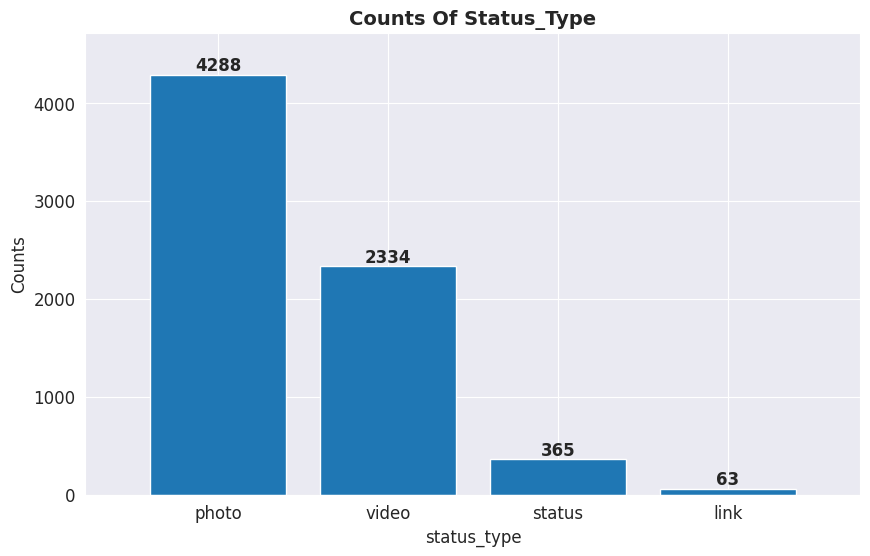

In [30]:
myplot(data,'status_type')

#### Which day has the highest counts?

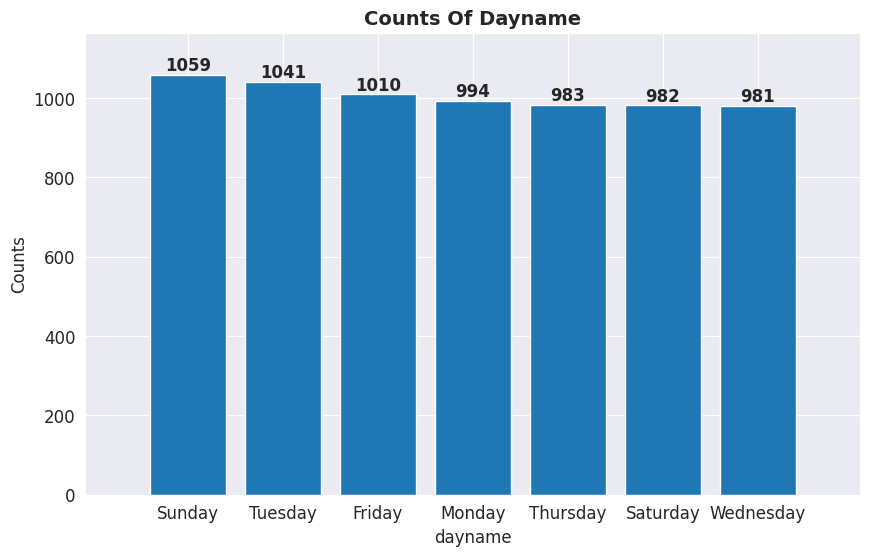

In [32]:
myplot(data,"dayname")

#### Which month has the highest counts?

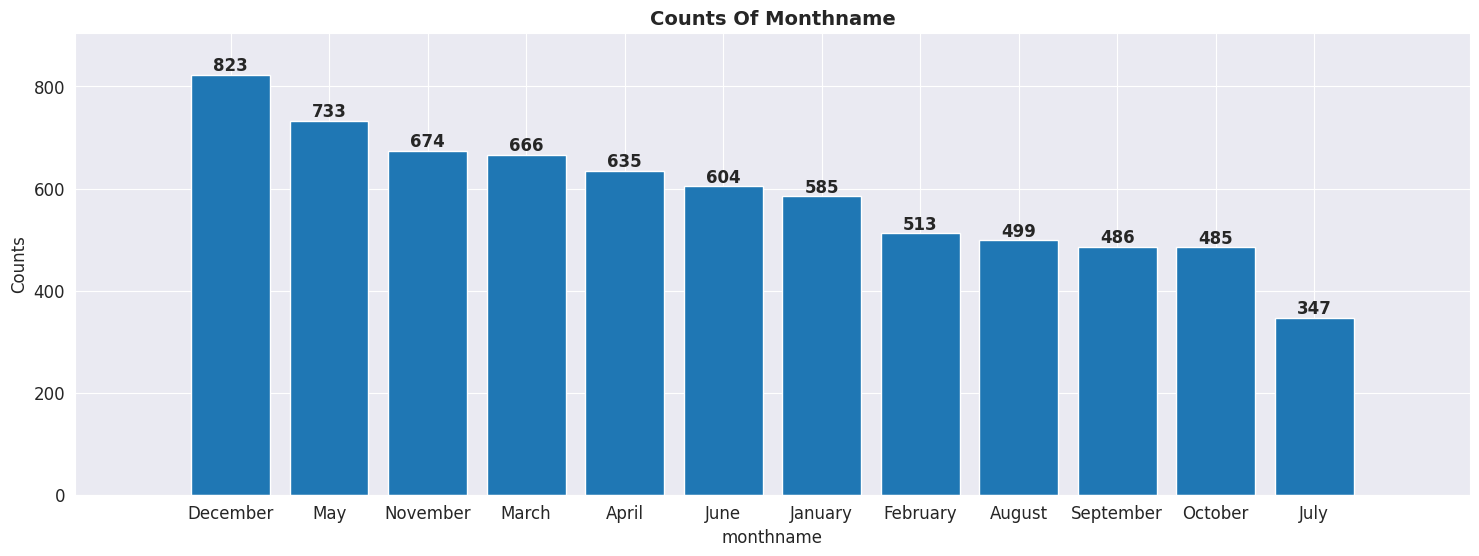

In [43]:
plt.rcParams["figure.figsize"] =(18,6)
myplot(data,"monthname", figsize = (20, 6))

Which year has the highest counts?

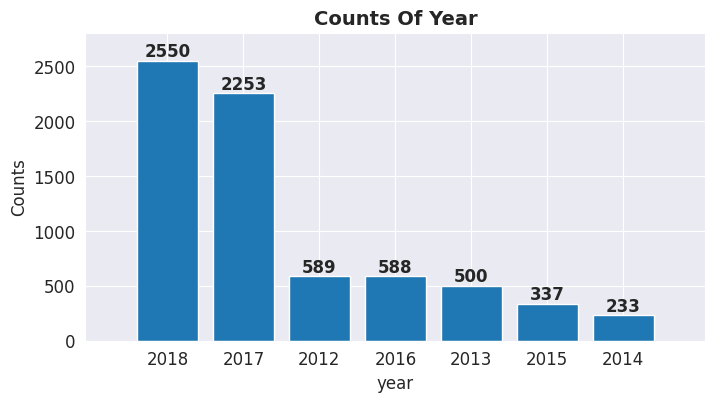

In [44]:
plt.rcParams["figure.figsize"] =(8,4)
data['year'] = data['year'].astype(str)
myplot(data,"year")

## Multivariate Analysis

In [56]:
# def to create function for plotting
def myplot_2(df, grpvar, yvar, stat ="mean", figsize = (12, 6), order = None):
    # plot 
    df.groupby([grpvar])[yvar].agg(stat).reindex(index = order).plot.bar(edgecolor ="black",figsize=figsize,rot =0);
    # Optional: after plotting tidy up labels
    grpvar = grpvar.replace("_"," ") # replace _ with space
    yvar = yvar.replace("num_"," ") # replace _ with space
    
    plt.title(f'{stat} of {yvar} by {grpvar}'.title(), fontsize =14, weight = "bold")
    # Add x label and format it
    plt.xlabel(grpvar.title, fontsize = 10, weight = "bold")
    
    # Add y label and format it
    plt.ylabel(f'{stat} of {yvar}'.title(), fontsize = 10, weight = "bold")
    
    

In [46]:
data.columns

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys', 'hour', 'dayname', 'daynumber',
       'monthname', 'year'],
      dtype='object')

#### Which status type has the most total number of reactions?

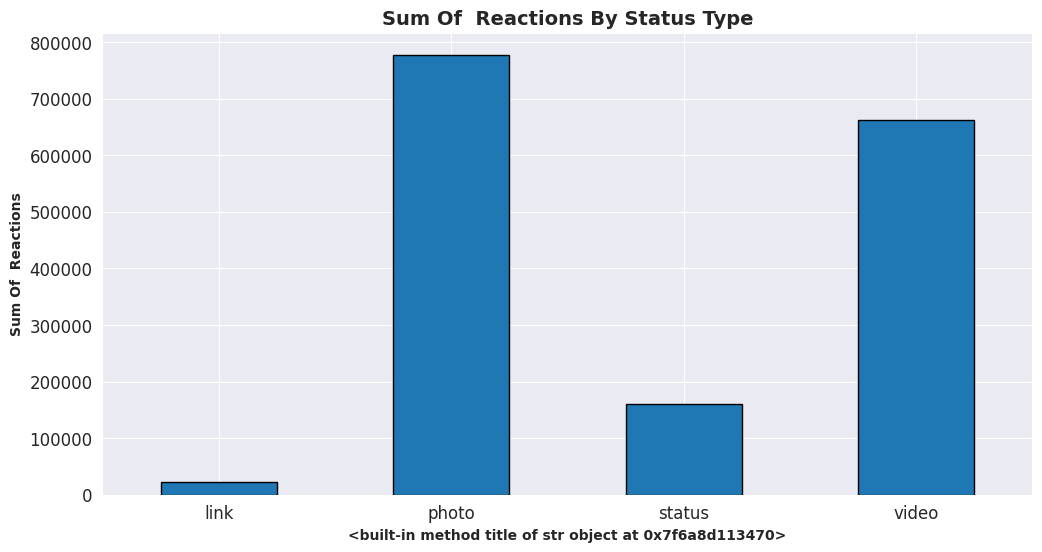

In [60]:
myplot_2(data,'status_type', 'num_reactions',stat = "sum")


#### Which status type has the most total number of  likes?

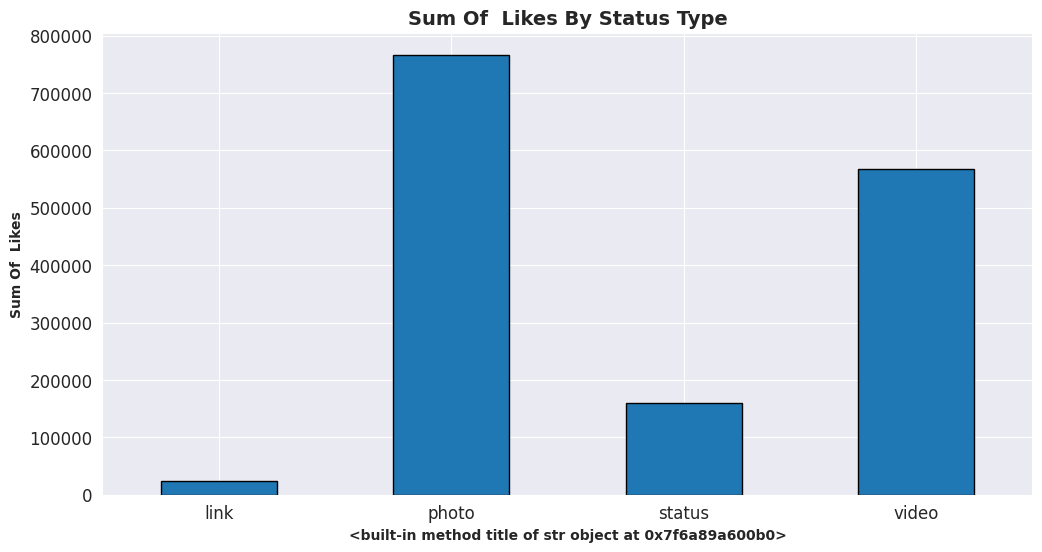

In [59]:
myplot_2(data,'status_type', 'num_likes',stat = "sum")

#### Which status type has the most total number of comments?

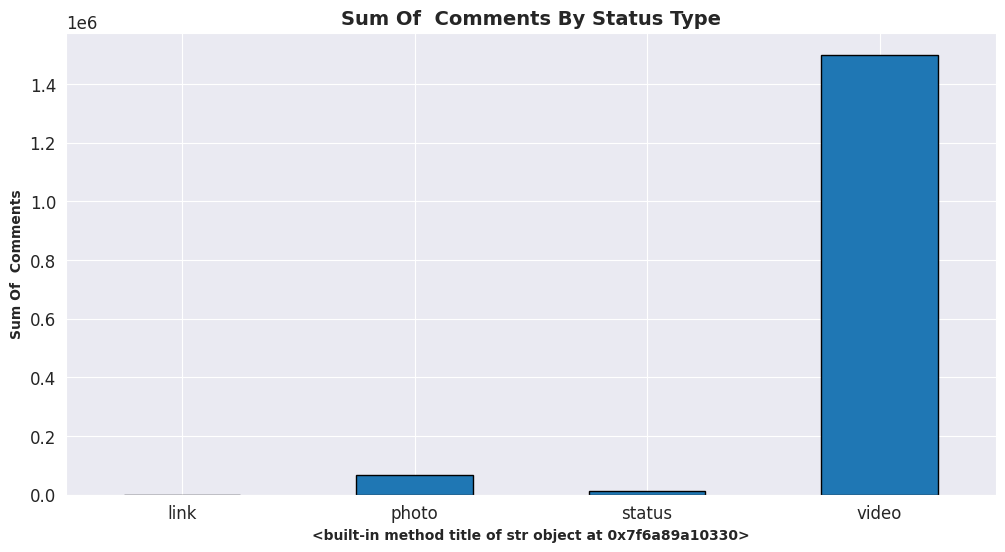

In [61]:
myplot_2(data,'status_type', 'num_comments',stat = "sum")

### Which status type has the most total number of shares?

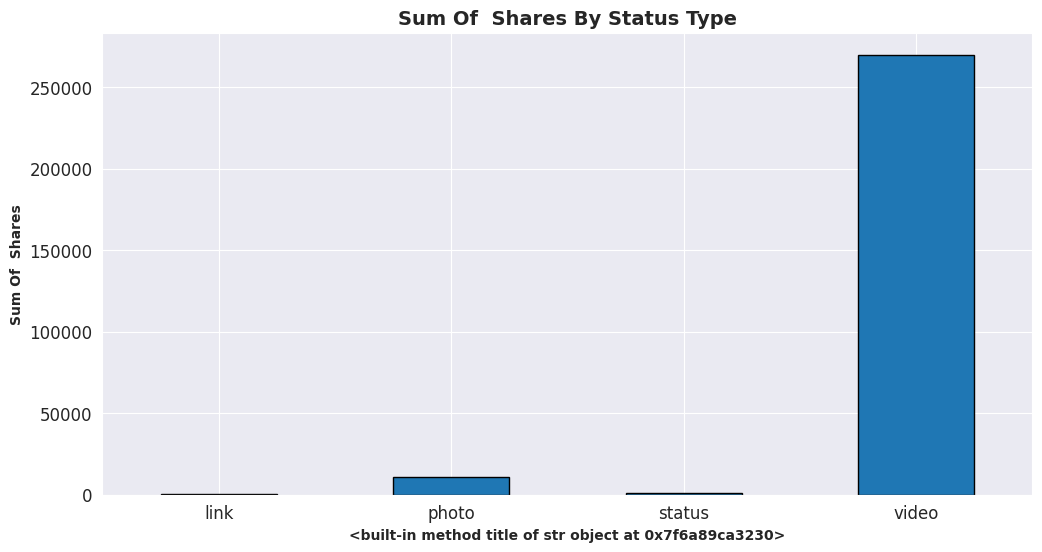

In [62]:
myplot_2(data,'status_type', 'num_shares',stat = "sum")

#### What is the averge number of share by status type?

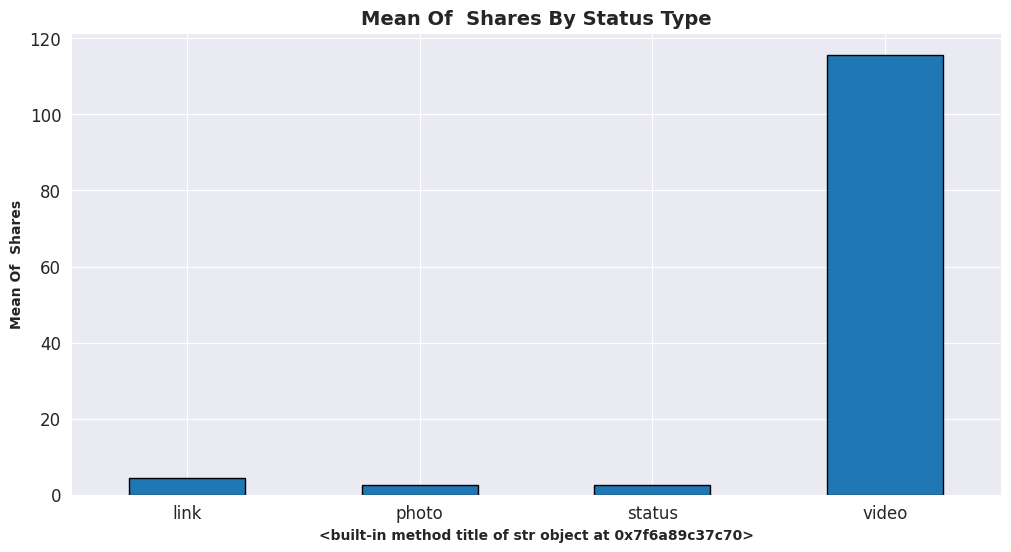

In [63]:
myplot_2(data,'status_type', 'num_reactions',stat = "mean")

#### What is the averge number of reactions by status type?

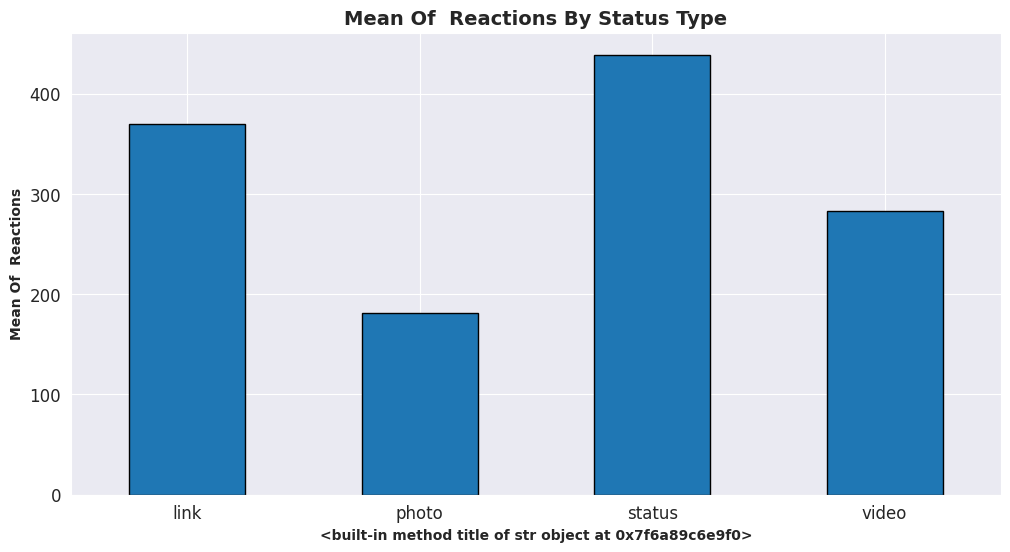

In [64]:
myplot_2(data,'status_type', 'num_reactions',stat = "mean")

#### What is the averge number of likes by status type?

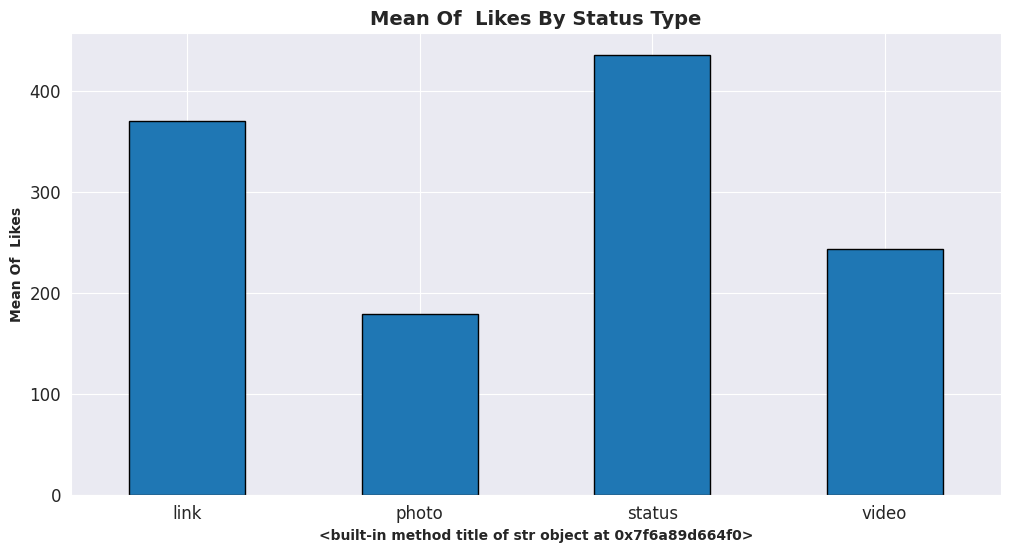

In [65]:
myplot_2(data,'status_type', 'num_likes',stat = "mean")

#### What is the averge number of comments by status type?

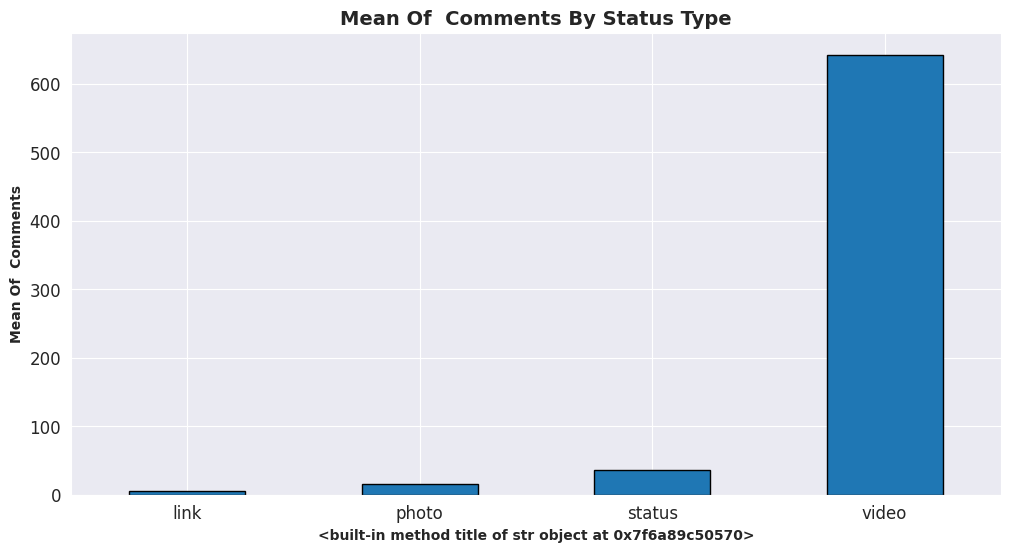

In [66]:
myplot_2(data,'status_type', 'num_comments',stat = "mean")

In [68]:
# days in order
days_in_order = ["Monday","Tuesday","Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

####What is this total number of comments by day of the week?

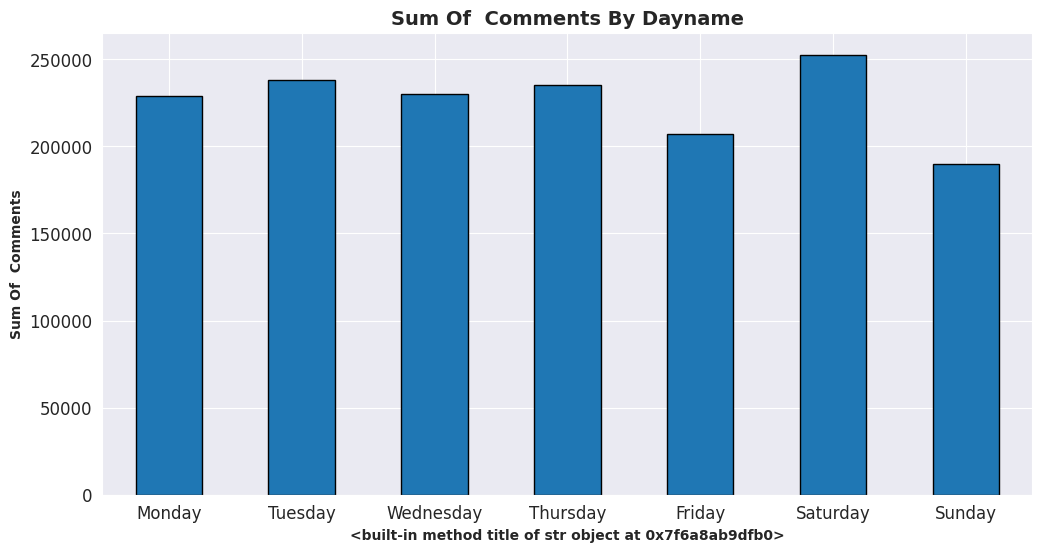

In [70]:
myplot_2(data,'dayname', 'num_comments',stat = "sum", order = days_in_order)

####What is this total number of reactions by day of the week?

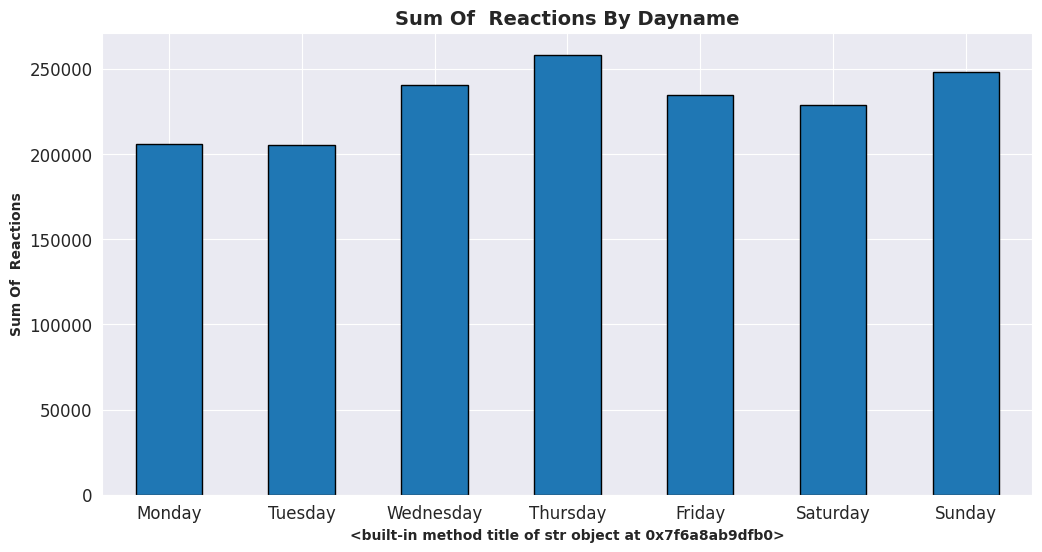

In [71]:
myplot_2(data,'dayname', 'num_reactions',stat = "sum", order = days_in_order)

####What is this total number of shares by day of the week?

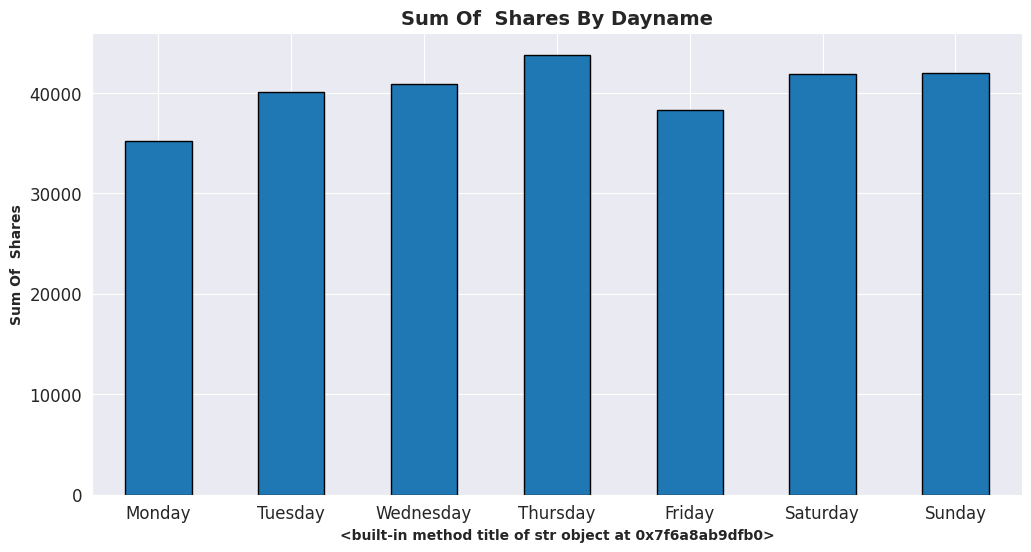

In [72]:
myplot_2(data,'dayname', 'num_shares',stat = "sum", order = days_in_order)

####What is this total number of likes by day of the week?

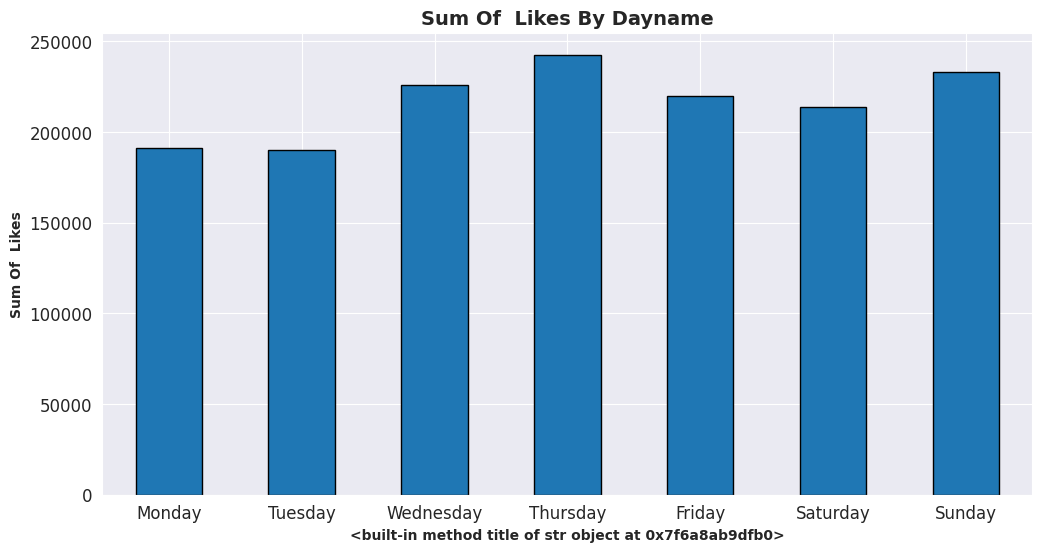

In [73]:
myplot_2(data,'dayname', 'num_likes',stat = "sum", order = days_in_order)

#### how are the features relate to each other?

In [74]:
data.corr()

<ipython-input-74-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,hour,daynumber
num_reactions,1.000000,0.150843,0.250723,0.994923,0.305003,0.267752,0.176028,0.075138,0.124326,0.017016,-0.006292
num_comments,0.150843,1.000000,0.640637,0.101687,0.521223,0.162394,0.325048,0.236453,0.225184,0.002515,-0.009402
num_shares,0.250723,0.640637,1.000000,0.172492,0.820000,0.407628,0.399826,0.199970,0.312513,-0.050917,-0.011513
num_likes,0.994923,0.101687,0.172492,1.000000,0.209308,0.207800,0.120784,0.052169,0.087431,0.021375,-0.006838
num_loves,0.305003,0.521223,0.820000,0.209308,1.000000,0.508798,0.507830,0.207600,0.371001,-0.042705,0.001897
num_wows,0.267752,0.162394,0.407628,0.207800,0.508798,1.000000,0.287756,0.086503,0.183087,-0.002816,0.009836
num_hahas,0.176028,0.325048,0.399826,0.120784,0.507830,0.287756,1.000000,0.141421,0.211910,-0.006964,0.004075
num_sads,0.075138,0.236453,0.199970,0.052169,0.207600,0.086503,0.141421,1.000000,0.142072,0.020918,-0.003213
num_angrys,0.124326,0.225184,0.312513,0.087431,0.371001,0.183087,0.211910,0.142072,1.000000,-0.012327,-0.013116
hour,0.017016,0.002515,-0.050917,0.021375,-0.042705,-0.002816,-0.006964,0.020918,-0.012327,1.000000,0.004608


<ipython-input-75-8b96879b4d02>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

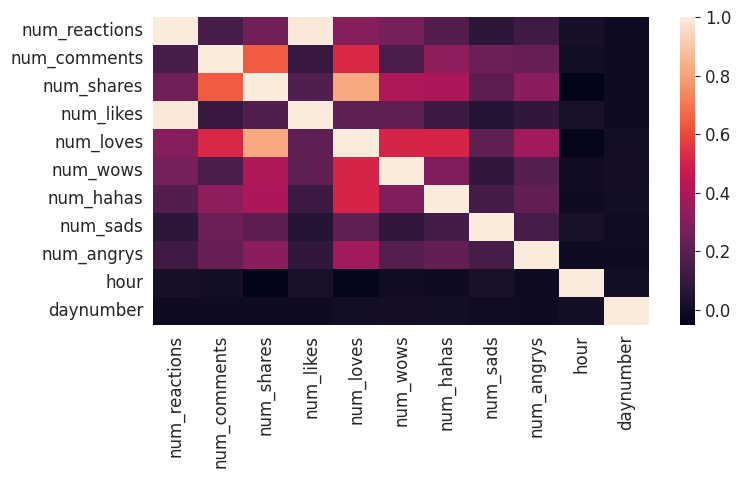

In [75]:
sns.heatmap(data.corr())

### What is the posting trend for a day?

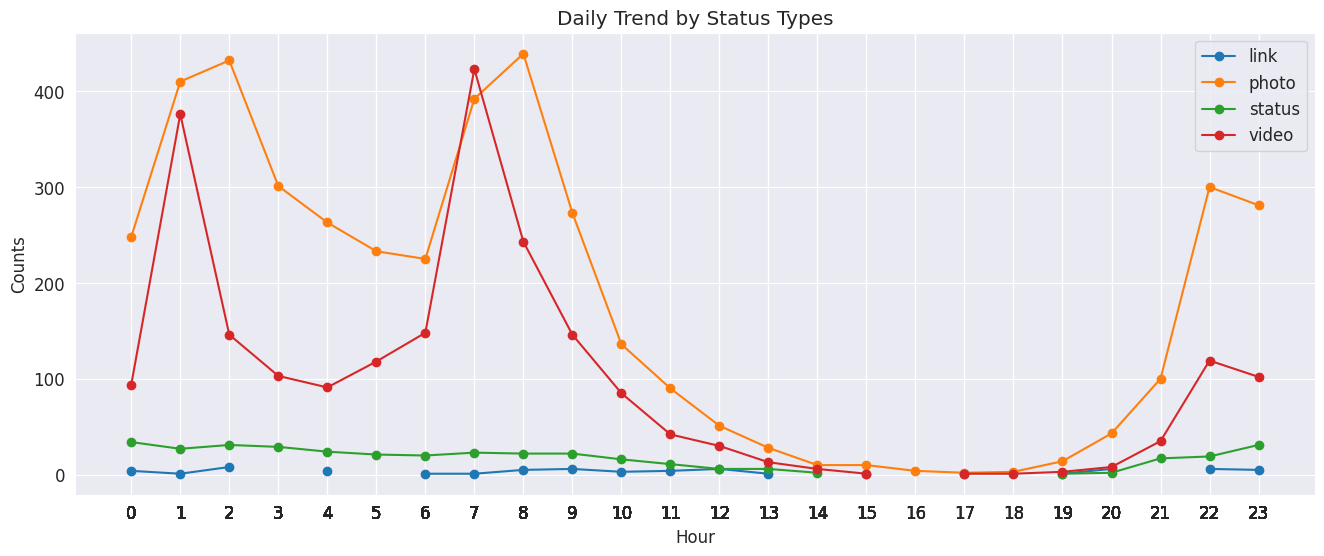

In [79]:
plt.rcParams["figure.figsize"] =(12,6)
def plot_hour_trend(data):
    # Group the data by 'hour' and 'status_type' and calculate the counts
    hour_counts = data.groupby(['hour', 'status_type']).size().unstack()

    # Create a line plot for each status type
    for status_type in hour_counts.columns:
        plt.plot(hour_counts.index, hour_counts[status_type], marker='o', label=status_type)

    # Set plot title and axis labels
    plt.title('Daily Trend by Status Types')
    plt.xticks(data["hour"])
    plt.xlabel('Hour')
    plt.ylabel('Counts')

    # Add legend
    plt.legend()

    # Display the plot
    plt.show()

# Call the function to plot the trend counts
plot_hour_trend(data)


#### What is the posting trend for a month?

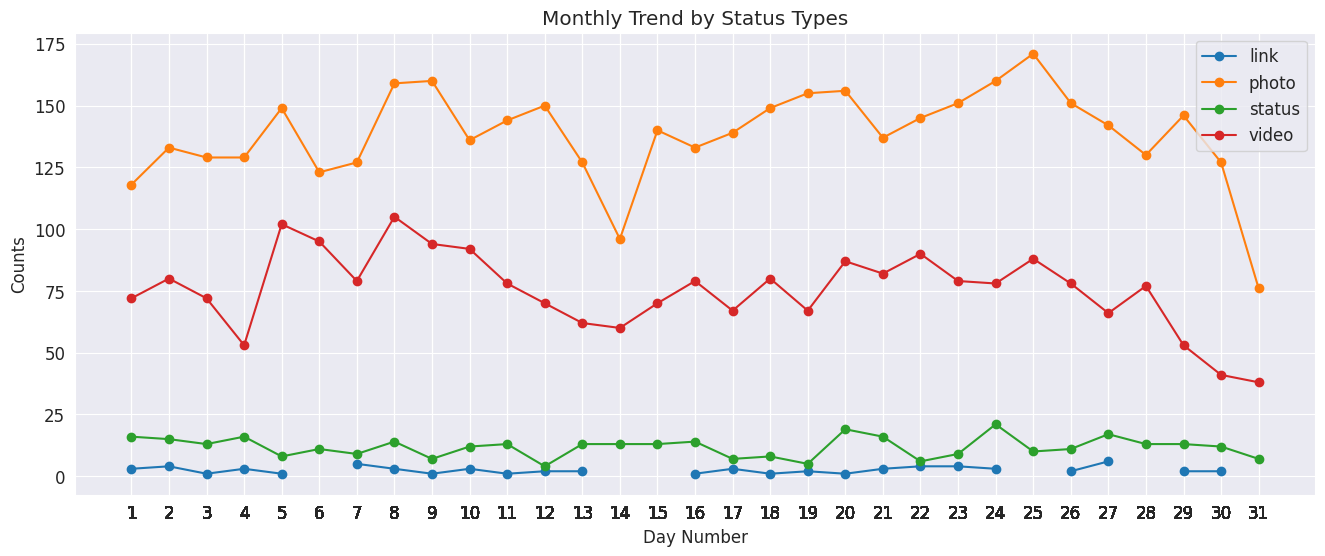

In [81]:
plt.rcParams["figure.figsize"] =(16,6)
def plot_hour_trend(data):
    # Group the data by 'hour' and 'status_type' and calculate the counts
    hour_counts = data.groupby(['daynumber', 'status_type']).size().unstack()

    # Create a line plot for each status type
    for status_type in hour_counts.columns:
        plt.plot(hour_counts.index, hour_counts[status_type], marker='o', label=status_type)

    # Set plot title and axis labels
    plt.title('Monthly Trend by Status Types')
    plt.xticks(data["daynumber"])
    plt.xlabel('Day Number')
    plt.ylabel('Counts')

    # Add legend
    plt.legend()

    # Display the plot
    plt.show()

# Call the function to plot the trend counts
plot_hour_trend(data)